In [115]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import cv2 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report,confusion_matrix

import warnings 
warnings.filterwarnings('ignore')

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
#directory
train_dir = ('/content/drive/MyDrive/Covid X-Ray Images Dataset/xray_dataset_covid19/train')
test_dir = ('/content/drive/MyDrive/Covid X-Ray Images Dataset/xray_dataset_covid19/test')

In [118]:
#checking labels
classes_train = os.listdir(train_dir)
classes_test = os.listdir(test_dir)
print(classes_train)
print(classes_test)

['PNEUMONIA', 'NORMAL']
['PNEUMONIA', 'NORMAL']


In [119]:
#checking the lengths of images present in training and testing set
print('Training images of COVID Normal :', len(os.listdir('/content/drive/MyDrive/Covid X-Ray Images Dataset/xray_dataset_covid19/train/NORMAL')))
print('Training images of COVID Pnuemonia :', len(os.listdir('/content/drive/MyDrive/Covid X-Ray Images Dataset/xray_dataset_covid19/train/PNEUMONIA')))
print('Testing images of COVID Normal :', len(os.listdir('/content/drive/MyDrive/Covid X-Ray Images Dataset/xray_dataset_covid19/test/NORMAL')))
print('Testing images of COVID Pneumonia :', len(os.listdir('/content/drive/MyDrive/Covid X-Ray Images Dataset/xray_dataset_covid19/test/PNEUMONIA')))

Training images of COVID Normal : 74
Training images of COVID Pnuemonia : 74
Testing images of COVID Normal : 20
Testing images of COVID Pneumonia : 20


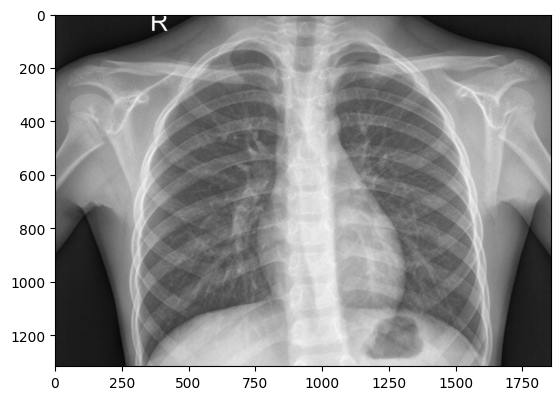

In [120]:
#Visualizing COVID-Normal image from training dataset
plt.imshow(cv2.imread('/content/drive/MyDrive/Covid X-Ray Images Dataset/xray_dataset_covid19/train/NORMAL/IM-0001-0001.jpeg'))

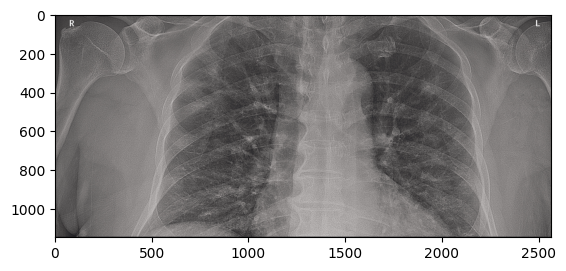

In [121]:
#Visualizing COVID-Pneumonia image from training dataset
plt.imshow(cv2.imread('/content/drive/MyDrive/Covid X-Ray Images Dataset/xray_dataset_covid19/train/PNEUMONIA/1-s2.0-S0140673620303706-fx1_lrg.jpg'))

**DATA AUGMENTATION**

In [122]:
#training set
train_datagen = ImageDataGenerator(
                horizontal_flip = True, 
                rescale = 1/255, 
                width_shift_range = 0.10, 
                height_shift_range = 0.10,
                shear_range = 0.1,
                fill_mode = 'nearest',
                rotation_range = 20, 
)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  class_mode = 'binary',
                  color_mode = 'rgb',
                  batch_size = 20,
                  target_size=(200,200)
)

Found 148 images belonging to 2 classes.


In [123]:
#testing set
test_datagen = ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 class_mode = 'binary',
                 color_mode = 'rgb',
                 batch_size = 20,
                 target_size = (200,200)
)

Found 40 images belonging to 2 classes.


**Callbacks**

In [124]:
es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 5)

**Model Architecture**

In [125]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(200,200,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.30))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 198, 198, 64)      1792      
                                                                 
 conv2d_24 (Conv2D)          (None, 196, 196, 64)      36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 65, 65, 64)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 65, 65, 64)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 63, 63, 32)        18464     
                                                                 
 conv2d_26 (Conv2D)          (None, 61, 61, 32)        9248      
                                                      

Compile the model

In [126]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

Fitting the model

In [127]:
model.fit(train_generator, 
          epochs = 30,
          validation_data = test_generator,
          callbacks = [es]
)

Epoch 1/30
8/8 [==============================] - 11s 903ms/step - loss: 0.6861 - accuracy: 0.5270 - val_loss: 0.6821 - val_accuracy: 0.5000
Epoch 2/30
8/8 [==============================] - 8s 1s/step - loss: 0.6003 - accuracy: 0.6959 - val_loss: 0.3322 - val_accuracy: 0.9000
Epoch 3/30
8/8 [==============================] - 7s 842ms/step - loss: 0.6860 - accuracy: 0.6757 - val_loss: 0.4816 - val_accuracy: 0.8500
Epoch 4/30
8/8 [==============================] - 8s 1s/step - loss: 0.5750 - accuracy: 0.7095 - val_loss: 0.5148 - val_accuracy: 0.7750
Epoch 5/30
8/8 [==============================] - 7s 821ms/step - loss: 0.5463 - accuracy: 0.7770 - val_loss: 0.4115 - val_accuracy: 0.9250
Epoch 6/30
8/8 [==============================] - 8s 1s/step - loss: 0.4086 - accuracy: 0.8446 - val_loss: 0.1886 - val_accuracy: 0.9750
Epoch 7/30
8/8 [==============================] - 7s 864ms/step - loss: 0.2835 - accuracy: 0.8784 - val_loss: 0.1325 - val_accuracy: 0.9750
Epoch 8/30
8/8 [============

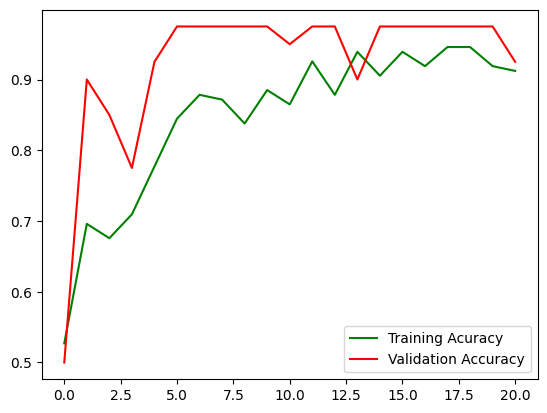

In [128]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

plt.figure()
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.legend()

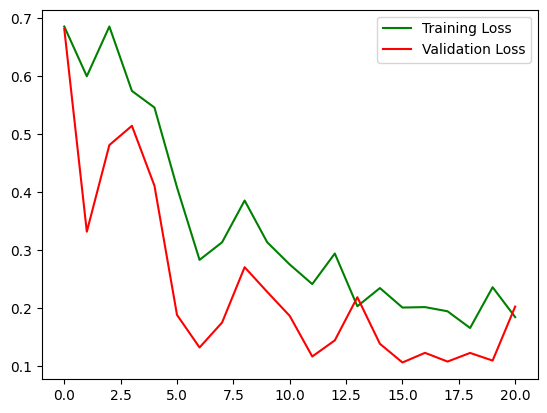

In [129]:
acc = model.history.history['loss']
val_acc = model.history.history['val_loss']

plt.figure()
plt.plot(acc,color = 'green',label = 'Training Loss')
plt.plot(val_acc,color = 'red',label = 'Validation Loss')
plt.legend()

Predictions

In [130]:
model.evaluate(test_generator)

2/2 [==============================] - 1s 404ms/step - loss: 0.2030 - accuracy: 0.9250


[0.20300467312335968, 0.925000011920929]

In [131]:
real = test_generator.classes
real

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [132]:
predictions = model.predict_generator(test_generator) > 0.5
predictions

array([[False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False]])

Axes(0.1675,0.11;0.5775x0.77)
report :               precision    recall  f1-score   support

           0       0.70      0.80      0.74        20
           1       0.76      0.65      0.70        20

    accuracy                           0.73        40
   macro avg       0.73      0.73      0.72        40
weighted avg       0.73      0.72      0.72        40



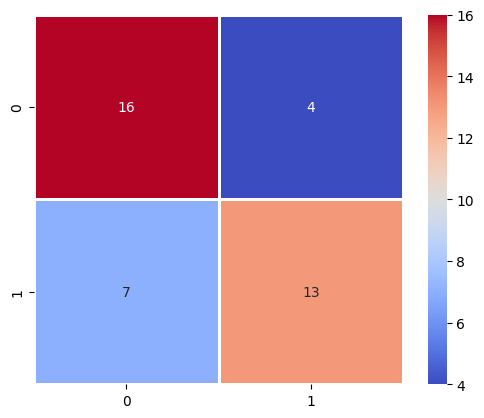

In [133]:
con = confusion_matrix(real, predictions)
print(sns.heatmap(con, cmap = 'coolwarm' , annot = True, fmt = 'd', linewidths=1 , square= True))
print('report :',classification_report(real, predictions ))

In [143]:
#checking normal-Covid image
predict_path = '/content/drive/MyDrive/Covid X-Ray Images Dataset/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0052-0001.jpeg'
my_image = image.load_img(predict_path, target_size=(200,200,3))

In [144]:
my_image = np.expand_dims(my_image, axis = 0)

In [145]:
#correct prediction
np.argmax(model.predict(my_image))

1/1 [==============================] - 0s 18ms/step


0